# Proyecto Final 

## Descripción del Proyecto: 

Este proyecto final tiene como objetivo aplicar los conocimientos adquiridos en el curso para resolver un problema real de regresión o clasificación. Los estudiantes deberán elegir entre desarrollar un modelo de regresión para predecir una variable continua o un modelo de clasificación para categorizar datos en clases distintas. El proyecto podrá centrarse en datos relacionados con su investigación o trabajo actual, o en caso de no disponer de datos propios, podrán utilizar conjuntos de datos de bases de datos públicas reconocidas. 

## Objetivos Específicos: 

1. Identificar un problema real que pueda ser abordado mediante técnicas de regresión o clasificación. 

2. Recolectar y preparar los datos necesarios para el modelo. Si se utilizan datos de bases públicas, se deberá justificar la elección y describir el conjunto de datos. 

3. Implementar un modelo de regresión o clasificación utilizando Python. Se puede hacer uso de librerías como Pandas, NumPy, Scikit-Learn, entre otras. 

4. Evaluar el modelo utilizando métricas apropiadas y discutir los resultados obtenidos. 

5. Presentar el trabajo final en un informe que incluya: introducción, metodología, análisis de resultados, conclusiones, y referencias. Además, se debe incluir el código desarrollado como anexo o en un repositorio en línea. 

# Introducción

Para el proyecto final de la materia de programación, he decidido abordar el tema de identificar los defectos en unidades de rodamientos de fricción líquida mediante la técnica de clasificación. El problema a resolver es identificar, a partir de un conjunto de datos experimentales, los defectos en rodamientos de fricción líquida. El experimento se realizó durante 10 minutos, con una frecuencia de obtención de datos sobre las oscilaciones del rotor de 1000 señales por segundo y una frecuencia de adquisición de datos de temperatura de una señal por segundo.

Los objetivos son clasificar los datos e identificar los defectos en los rodamientos de fricción líquida. Los defectos se clasifican de la siguiente manera:

1. Sin defectos
2. Desalineación en el acoplamiento
3. Presencia de desequilibrio
4. Casquillo con defectos

Cada columna del conjunto de datos corresponde a un parámetro específico, y las filas contienen los valores de las lecturas de los sensores en cada período de tiempo. Los datos del sensor de temperatura se duplican cada segundo para simplificar las relaciones de datos. Las columnas del conjunto de datos son las siguientes:

1. Vibraciones horizontales en el rodamiento izquierdo (Volts)
2. Vibraciones verticales en el rodamiento izquierdo (Volts)
3. Vibraciones horizontales en el rodamiento derecho (Volts)
4. Vibraciones verticales en el rodamiento derecho (Volts)
5. Oscilaciones horizontales en el rodamiento izquierdo (Volts)
6. Oscilaciones verticales en el rodamiento izquierdo (Volts)
7. Oscilaciones horizontales en el rodamiento derecho (Volts)
8. Oscilaciones verticales en el rodamiento derecho (Volts)
9. Temperatura del cojinete izquierdo (Ohms)
10. Temperatura del cojinete derecho (Ohms)
11. Tipo de defecto o clase

Para la obtención de los datos, se realizó una búsqueda en los registros de experimentos previos. Se consideró ordenarlos de manera que coincidieran con la clasificación de defectos que presentaba cada uno de ellos. En base a los experimentos realizados, se preparó una base de datos de 323,017 registros. Esto se logró mediante la unión de varios documentos de pruebas realizadas y su ordenamiento, con el objetivo de obtener una base de datos lo suficientemente grande para implementar un método de clasificación de datos.

El objetivo es clasificar las características de los datos para determinar si el material o el defecto pertenece a los tipos 1, 2, 3 o 4. De este modo, en futuros experimentos, se podrá tener una mayor certeza sobre cuáles son las características que definen cada tipo de defecto y se podrá hacer una predicción más precisa de los datos.

# Exploracion de los datos

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import seaborn as sns

# Cargar el archivo CSV
material = pd.read_csv('Data_project.csv')
material.head()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing,defect_class
0,5.683,6.458,5.922,7.278,5.712,6.469,5.919,7.336,1102.088,1103.586,1
1,5.713,6.412,5.871,7.257,5.710,6.462,5.934,7.316,1102.088,1103.586,1
2,5.680,6.406,5.877,7.279,5.706,6.454,5.938,7.299,1102.088,1103.586,1
3,5.682,6.438,5.872,7.231,5.702,6.446,5.933,7.284,1102.088,1103.586,1
4,5.677,6.345,5.806,7.243,5.698,6.437,5.921,7.272,1102.088,1103.586,1


Los datos de las columnas representan los datos obtenidos por un sensor inductivo que representa la vibración y oscilación que presenta una maquina rotativa en sus unidades de rodamiento de friccion liquida, por lo cual nos permite hacer una clasificacion de los datos para definir que tipo de defecto esta presentando 
1. Vibraciones horizontales en el rodamiento izquierdo (Volts)
2. Vibraciones verticales en el rodamiento izquierdo (Volts)
3. Vibraciones horizontales en el rodamiento derecho (Volts)
4. Vibraciones verticales en el rodamiento derecho (Volts)
5. Oscilaciones horizontales en el rodamiento izquierdo (Volts)
6. Oscilaciones verticales en el rodamiento izquierdo (Volts)
7. Oscilaciones horizontales en el rodamiento derecho (Volts)
8. Oscilaciones verticales en el rodamiento derecho (Volts)
9. Temperatura del cojinete izquierdo (Ohms)
10. Temperatura del cojinete derecho (Ohms)
11. Tipo de defecto
    1. Sin defectos (1)
    2. Desalineación en el acoplamiento (2)
    3. Presencia de desequilibrio (3)
    4. Casquillo con defectos (4)

In [2]:
# Separar características y etiquetas
caracteristicas = [
    'Fluctuations_X_in_the_left_bearing', 
    'Fluctuations_Y_in_the_left_bearing', 
    'Fluctuations_X_in_the_right_bearing', 
    'Fluctuations_Y_in_the_right_bearing',
    'Fluctuations_X_in_the_left_bearing_smooth',
    'Fluctuations_Y_in_the_left_bearing_smooth',
    'Fluctuations_X_in_the_right_bearing_smooth',
    'Fluctuations_Y_in_the_right_bearing_smooth',
    'Temperature_in_the_left_bearing',
    'Temperature_in_the_right_bearing'
]
etiqueta = 'defect_class'

X = material[caracteristicas].values
y = material[etiqueta].values

# Mostrar las primeras 5 filas de características y etiquetas
for n in range(5):
    print(f"Características: {list(X[n])}")
    print(f"Etiqueta: {y[n]}\n")

Características: [5.683, 6.458, 5.922, 7.278, 5.712, 6.469, 5.919, 7.336, 1102.088, 1103.586]
Etiqueta: 1

Características: [5.713, 6.412, 5.871, 7.257, 5.71, 6.462, 5.934, 7.316, 1102.088, 1103.586]
Etiqueta: 1

Características: [5.68, 6.406, 5.877, 7.279, 5.706, 6.454, 5.938, 7.299, 1102.088, 1103.586]
Etiqueta: 1

Características: [5.682, 6.438, 5.872, 7.231, 5.702, 6.446, 5.933, 7.284, 1102.088, 1103.586]
Etiqueta: 1

Características: [5.677, 6.345, 5.806, 7.243, 5.698, 6.437, 5.921, 7.272, 1102.088, 1103.586]
Etiqueta: 1



Counts:
 defect_class
4    83069
2    81765
1    79423
3    78759
Name: count, dtype: int64

Proportions:
 defect_class
4    0.257167
2    0.253130
1    0.245879
3    0.243824
Name: count, dtype: float64


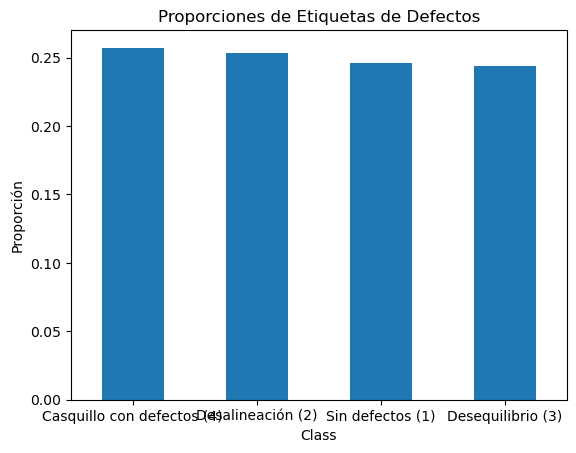

In [4]:
# Contar las etiquetas de la variable 'Class'
counts = material['defect_class'].value_counts()
proportions = counts / len(material)

# Mostrar los conteos y proporciones
print("Counts:\n", counts)
print("\nProportions:\n", proportions)

# Graficar (opcional)
proportions.plot(kind='bar')
plt.title('Proporciones de Etiquetas de Defectos')
plt.xlabel('Class')
plt.ylabel('Proporción')
plt.xticks([0, 1, 2, 3], ['Casquillo con defectos (4)', 'Desalineación (2)','Sin defectos (1)','Desequilibrio (3)' ], rotation=0)
plt.show()

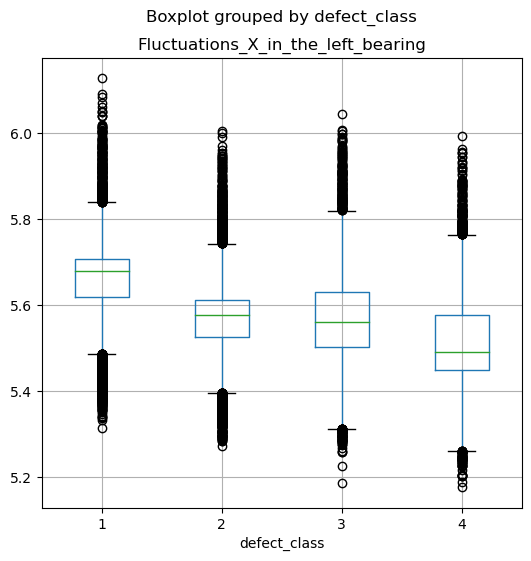

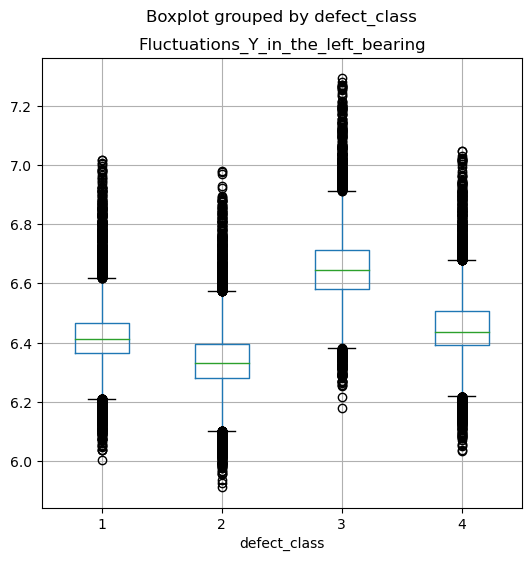

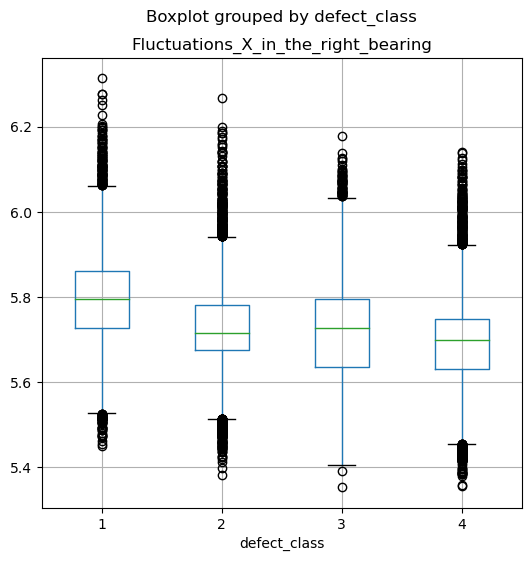

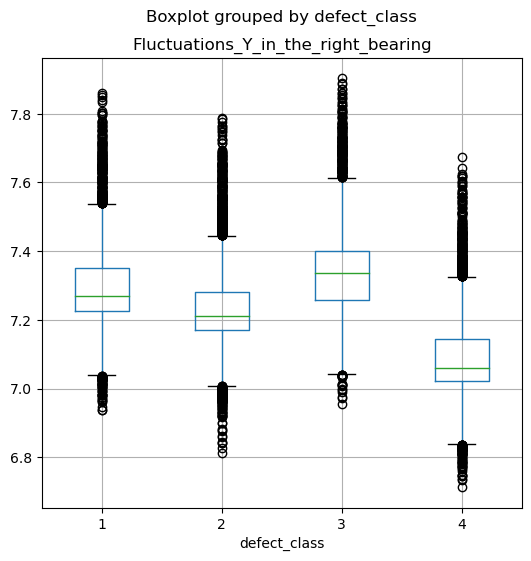

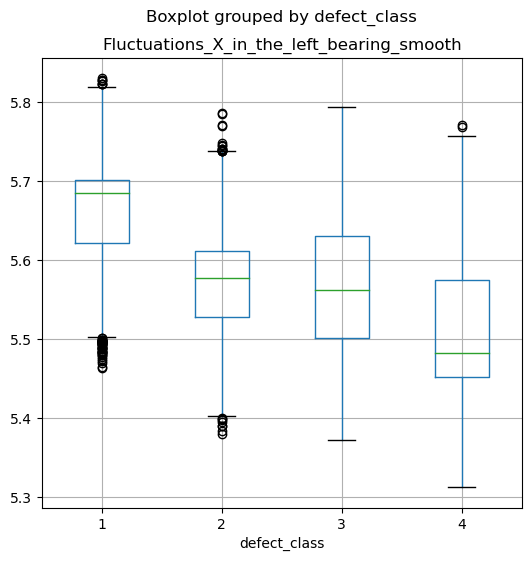

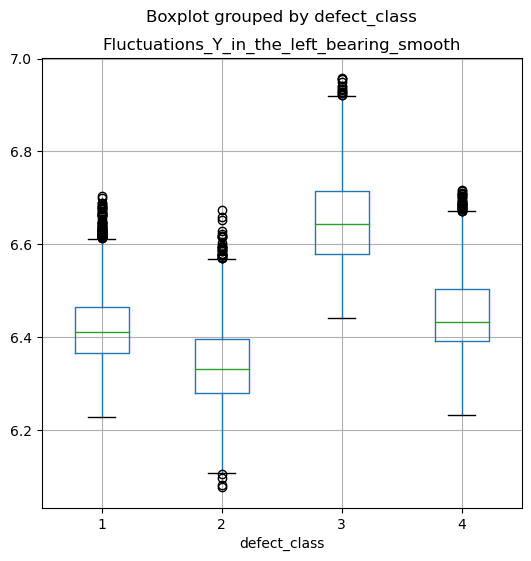

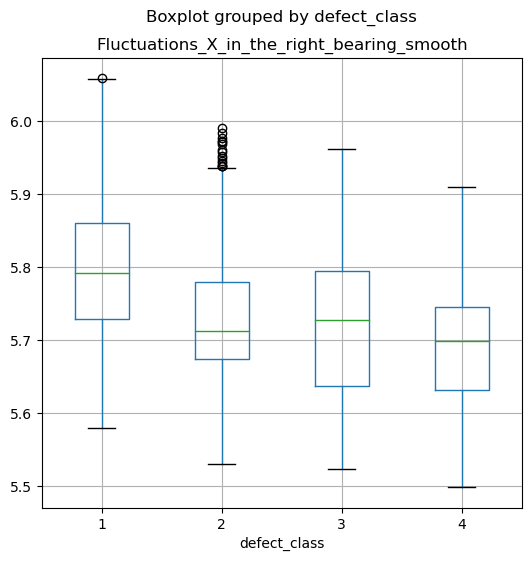

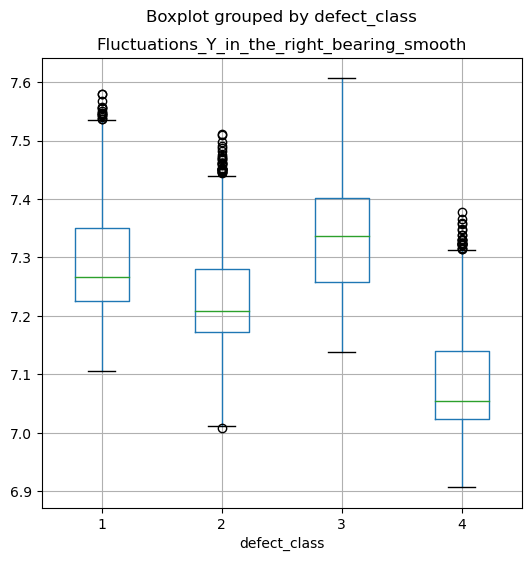

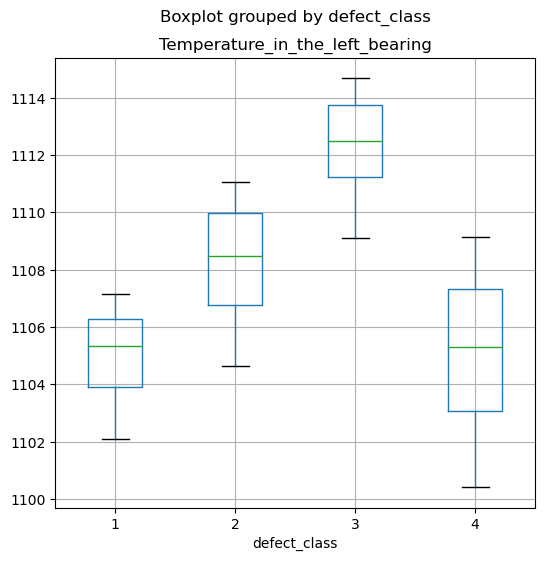

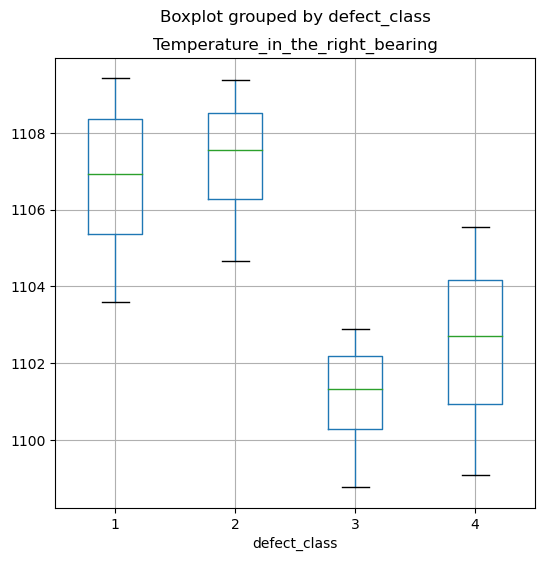

In [14]:
features = ['Fluctuations_X_in_the_left_bearing', 
    'Fluctuations_Y_in_the_left_bearing', 
    'Fluctuations_X_in_the_right_bearing', 
    'Fluctuations_Y_in_the_right_bearing',
    'Fluctuations_X_in_the_left_bearing_smooth',
    'Fluctuations_Y_in_the_left_bearing_smooth',
    'Fluctuations_X_in_the_right_bearing_smooth',
    'Fluctuations_Y_in_the_right_bearing_smooth',
    'Temperature_in_the_left_bearing',
    'Temperature_in_the_right_bearing']
for col in features:
    material.boxplot(column=col, by='defect_class', figsize=(6,6))
    plt.title(col)
plt.show()

Los diagramas de caja muestran diferencias significativas en las distribuciones de las características entre las diferentes clases de defectos.
Estas diferencias pueden ser explotadas por un modelo de clasificación para identificar y distinguir entre los distintos tipos de defectos en los rodamientos de fricción líquida.
Específicamente, las fluctuaciones horizontales y verticales, tanto suavizadas como sin suavizar, así como las temperaturas de los cojinetes, son características importantes para la clasificación de los defectos.


# Entrenamiento y evaluación del módelo
se utiliza el algoritmo Random Forest para entrenar el modelo de clasificación.

In [15]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 258412
Test cases: 64604


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el clasificador Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Generar reporte de clasificación y matriz de confusión
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)



Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     15950
           2       1.00      1.00      1.00     16338
           3       1.00      1.00      1.00     15620
           4       1.00      1.00      1.00     16696

    accuracy                           1.00     64604
   macro avg       1.00      1.00      1.00     64604
weighted avg       1.00      1.00      1.00     64604

Confusion Matrix:
 [[15950     0     0     0]
 [    2 16336     0     0]
 [    0     0 15620     0]
 [    0     0     0 16696]]


# conclusiones
**Precision, Recall y F1-Score:**

Todas las métricas (precisión, recall y F1-score) son aceptables (1.00) para todas las clases. Esto muestra que el modelo predice correctamente todas las instancias de cada clase sin errores.
Estas métricas indican un rendimiento ideal del modelo en los datos de prueba.

Accuracy:
La exactitud (accuracy) del modelo es 1.00, lo que significa que el modelo clasifica correctamente todas las instancias en los datos de prueba.

Matriz de Confusión:
La matriz de confusión muestra que todas las predicciones se alinean perfectamente con las etiquetas reales, sin ningún error de clasificación.
Todas las diagonales de la matriz de confusión tienen valores correspondientes al número de instancias de cada clase, y no hay valores fuera de las diagonales, lo que confirma la clasificación perfecta.


In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.569748   0.75180719 0.99786388 1.         0.57548411]
Mean Cross-Validation Score: 0.7789806363543389
